<h1>Interrogating Indonesian Islamic Social Movement Organizations; A computational content analysis approach.</h1>

A social movement is a vehicle for ordinary citizens who lack regular access to representative institutions to engage in politics by exerting power through contentious means. They operate in the realm of informal politics. Meanwhile, political parties are deemed to stand in the realm of formal politics as unlike social movement, they are seeking to control the government by winning elections. I will use computational content analysis to examine how non-state actors—specifically, Indonesian Islamic social movement organizations (SMO)—become a powerful political force.

Existing research on social movements seems insufficient to explain how Islamic SMOs hold so much political power despite their lack of representation in formal party politics. Contentious politics becomes a way for these SMOs to make political demands through mass mobilizations and protests in exchange for electoral support to political parties. The main question that will be addressed in this paper is how Islamic SMOs relate to political parties in advancing their issues. Despite opportunities to enter formal party politics, some organizations maintain their contentious position by operating outside political parties. **How do Islamic SMOs position themselves against Islamic political parties, secular political parties, and the government? Despite using different political tactics in formal and informal political spheres, are they actually that different from each other? How does Islamic SMO’s activism become so politically important?**

I will interrogate narratives from newspaper reports pertinent to Islamic SMOs in Indonesia between 2008 and 2018. While there is a lack of self-documentation by the organizations regarding their activities, the stories that are reported in national newspapers often signal the events’ significance. To process a large amount of data, I will use computational content analysis to understand the SMOs’ tactics and to model the relationship between Islamic SMOs, political parties, and the government.


<h3>What?</h3>

To capture the SMO and parties' political nature of relationship I will focus on articles published around 3 election cycles between 2018 -2019. The elections that I will be looking at are:

1. **2008 - 2009** for the 2009 Legislative and Presidenial Elections
2. **2013 - 2014** for the 2014 Legislative and Presidenial Elections
3. **2016 - 2017** for the 2017 Jakarta (Indonesian capital city) gubernatorial elections.

Although the third election cycle is different from the others, it sets the battleground for the 2019 presidential elections as parties began to form coalitions for the next elections. This is also the time where political parties are courting SMO to gain popularity among the electorates.


<h3>How?</h3>

I will use techniques introduced in the Computational Content Analysis class in this project.

1. **Scrape website.** (WEEK 1)<br>
Scrape news articles between 2008 - 2018 with SMO names and 'party' as keywords from Jakarta Post. Saving it as CSV files.
2. **Create a name list of party and organization members.**<br>
Make a list of party and organization members then save it as a CSV file.
3. **Prepare the dataset.** (WEEK 2)<br>
Tokenizing and normalizing sentences with nltk.
4. **Create a co-occurrence matrix between people in news articles.** (WEEK 2)<br>
For every person in the name list find how many articles that they co-occur with other people in the list.
5. **Create a graph.** (WEEK 8)<br>
Make the people as nodes in the network and the number of co-occurences in news articles as the weight of their ties.
6. **Use Gephi to visualize it.**<br>
Export the graph to Gephi and customize the graph.
7. **Analyze actors/organizations.**<br>
o) Looking at linguistic change (WEEK 4)<br>
o) Look at bigrams & trigrams (WEEK 2)<br>
o) Explore concordance index (WEEK 2)<br>
o) POS Tagging (WEEK 7)<br>
o) Name Entity Recognition (WEEK 7)<br>
o) Dependency Parsing and Graph Representation (WEEK 7)<br>


In [3]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/Computational-Content-Analysis-2018/lucem_illud.git

#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import nltk #For stop words and stemmers
import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA
import sklearn.feature_extraction
from nltk.corpus import stopwords #For stopwords

#gensim uses a couple of deprecated features
#we can't do anything about them so lets ignore them 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

#This will be doing most of the work
import networkx as nx

<h2>1. Scrape website</h2>
**(WEEK 1)**

Using techniques from week 1 I transformed the scraped news articles into CSV files. Save them as df_new.

Getting our corpora.

In [4]:
newsDF = pandas.read_csv('nu_simple.csv', encoding='utf-8')
len(newsDF)

1724

In [5]:
newsDF2 = pandas.read_csv('party_simple.csv', encoding='latin-1')
len(newsDF2)

25129

<h2>2. Create a name list of party and organization members.</h2>

Make a list of party and organization members then save it as a CSV file. Save it as nameDF.

Getting name list.

In [2]:
nameDF = pandas.read_csv('name_list - Sheet1.csv', encoding='utf-8')
nameDF[:3]

,smo,name,actor,first_name,last_name,type,other_name
0,True,NU,Helmy Faishal Zaini,Helmy,Faishal Zaini,individual,NaN
1,True,NU,Said Aqil Siradj,Said Aqil,Siradj,individual,NaN
2,True,NU,Ma’ruf Amin,Ma'ruf,Amin,individual,NaN


<h2>2. Prepare the dataset.</h2>

Cleaning and merding the dataset so I can work with it then tokenizing and normalizing sentences with nltk.

In [6]:
#Drop missing values
newsDF = newsDF.dropna()
newsDF2 = newsDF2.dropna()

#Merge 2 news files
df_new = pandas.concat([newsDF, newsDF2])

In [7]:
df_new['tokenized_sents'] = df_new['Article'].apply(lambda x: 
                                                               [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
df_new['normalized_sents'] = df_new['tokenized_sents'].apply(lambda x: 
                                                                           [lucem_illud.normalizeTokens(s, 
                                                                                           stopwordLst = lucem_illud.stop_words_basic, 
                                                                                           stemmer = None) 
                                                                            for s in x])

df_new[:3]

,Date,Title,Article,Link,Year,tokenized_sents,normalized_sents
0,"Sun, November 26, 2017",Politics must be free from religious sentiment...,The national meeting (Munas) and major confere...,http://www.thejakartapost.com/news/2017/11/26/...,2017,"[[The, national, meeting, (, Munas, ), and, ma...","[[national, meeting, munas, major, conference,..."
1,"Thu, November 23, 2017",Radicalism prevention key amid rapid IT advanc...,Radicalism prevention and terrorist deradicali...,http://www.thejakartapost.com/news/2017/11/23/...,2017,"[[Radicalism, prevention, and, terrorist, dera...","[[radicalism, prevention, terrorist, deradical..."
2,"Thu, November 23, 2017","Jokowi praises NU's roles in building peace, t...",President Joko 'Jokowi' Widodo has said that t...,http://www.thejakartapost.com/news/2017/11/23/...,2017,"[[President, Joko, 'Jokowi, ', Widodo, has, sa...","[[president, joko, widodo, said, government, a..."


<h2>3. Word Embedding: Linguistic change</h2>
**(WEEK 4)**

Using word embedding we can look at how words change over time. We will look at the word 'election' to understand changes in its use within the news articles. However, the word election could refer to other local elections rather than the 3 that we are focusing at so we will also look at the word 'coalition' as parties contending at the national level are more likely to form coalitions rather than parties contending at the local level.

Below is code that aligns the dimensions of multiple embeddings arrayed over time or some other dimension and allow identification of semantic change as the word vectors change their loadings for focal words. This code comes from the approach piloted at Stanford by William Hamilton, Daniel Jurafsky and Jure Lescovec.

In [274]:
def calc_syn0norm(model):
    """since syn0norm is now depricated"""
    return (model.wv.syn0 / np.sqrt((model.wv.syn0 ** 2).sum(-1))[..., np.newaxis]).astype(np.float32)

def smart_procrustes_align_gensim(base_embed, other_embed, words=None):
    """Procrustes align two gensim word2vec models (to allow for comparison between same word across models).
    Code ported from HistWords <https://github.com/williamleif/histwords> by William Hamilton <wleif@stanford.edu>.
    (With help from William. Thank you!)
    First, intersect the vocabularies (see `intersection_align_gensim` documentation).
    Then do the alignment on the other_embed model.
    Replace the other_embed model's syn0 and syn0norm numpy matrices with the aligned version.
    Return other_embed.
    If `words` is set, intersect the two models' vocabulary with the vocabulary in words (see `intersection_align_gensim` documentation).
    """
    base_embed = copy.copy(base_embed)
    other_embed = copy.copy(other_embed)
    # make sure vocabulary and indices are aligned
    in_base_embed, in_other_embed = intersection_align_gensim(base_embed, other_embed, words=words)

    # get the embedding matrices
    base_vecs = calc_syn0norm(in_base_embed)
    other_vecs = calc_syn0norm(in_other_embed)

    # just a matrix dot product with numpy
    m = other_vecs.T.dot(base_vecs) 
    # SVD method from numpy
    u, _, v = np.linalg.svd(m)
    # another matrix operation
    ortho = u.dot(v) 
    # Replace original array with modified one
    # i.e. multiplying the embedding matrix (syn0norm)by "ortho"
    other_embed.wv.syn0norm = other_embed.wv.syn0 = (calc_syn0norm(other_embed)).dot(ortho)
    return other_embed
    
def intersection_align_gensim(m1,m2, words=None):
    """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    # Find the common vocabulary
    common_vocab = vocab_m1&vocab_m2
    if words: common_vocab&=set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count,reverse=True)

    # Then for each model...
    for m in [m1,m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.vocab[w].index for w in common_vocab]
        old_arr = calc_syn0norm(m)
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.syn0norm = m.wv.syn0 = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        m.index2word = common_vocab
        old_vocab = m.wv.vocab
        new_vocab = {}
        for new_index,word in enumerate(common_vocab):
            old_vocab_obj=old_vocab[word]
            new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
        m.wv.vocab = new_vocab

    return (m1,m2)

In [276]:
import copy

We will be creating many embeddings so we have created this function to do most of the work. It creates two collections of embeddings, one the original and one the aligned.

In [272]:
def compareModels(df, category, sort = True):
    """If you are using time as your category sorting is important"""
    embeddings_raw = {}
    cats = sorted(set(df[category]))
    for cat in cats:
        #This can take a while
        print("Embedding {}".format(cat), end = '\r')
        subsetDF = df[df[category] == cat]
        #You might want to change the W2V parameters
        embeddings_raw[cat] = gensim.models.word2vec.Word2Vec(subsetDF['normalized_sents'].sum())
    #These are much quicker
    embeddings_aligned = {}
    for catOuter in cats:
        embeddings_aligned[catOuter] = [embeddings_raw[catOuter]]
        for catInner in cats:
            embeddings_aligned[catOuter].append(smart_procrustes_align_gensim(embeddings_aligned[catOuter][-1], embeddings_raw[catInner]))
    return embeddings_raw, embeddings_aligned

Let's generate a model.

In [277]:
rawEmbeddings, comparedEmbeddings = compareModels(df_new, 'Year')

We need to compare them across all permutations so we will define another function to help, we will be using 1 - cosine similarity as that gives a more intuitive range of 0-2 with low values meaning little change and high meaning lots of change.

In [278]:
def getDivergenceDF(word, embeddingsDict):
    dists = []
    cats = sorted(set(embeddingsDict.keys()))
    dists = {}
    for cat in cats:
        dists[cat] = []
        for embed in embeddingsDict[cat][1:]:
            dists[cat].append(np.abs(1 - sklearn.metrics.pairwise.cosine_similarity(np.expand_dims(embeddingsDict[cat][0][word], axis = 0),
                                                                             np.expand_dims(embed[word], axis = 0))[0,0]))
    return pandas.DataFrame(dists, index = cats)

Let's look at how the word 'election' changes throughout the year.

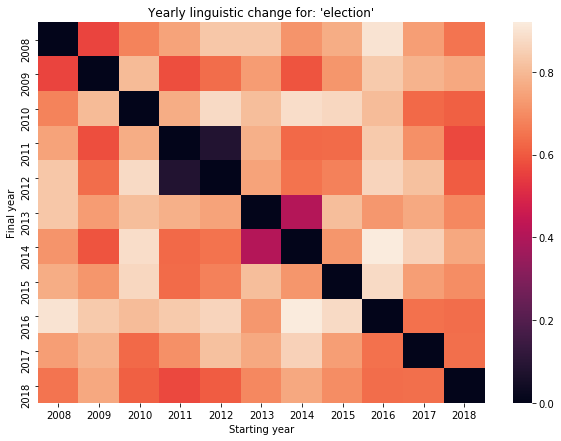

In [402]:
targetWord = 'election'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

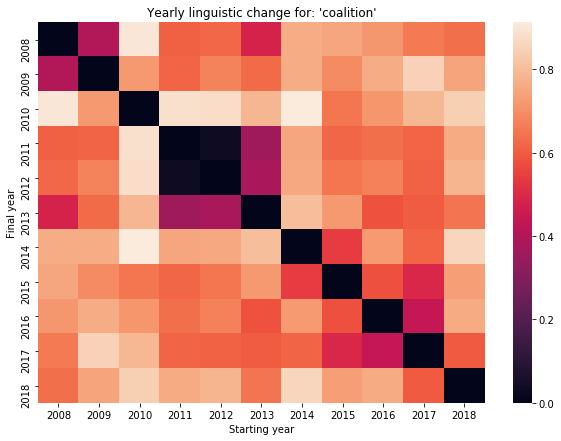

In [284]:
targetWord = 'coalition'

pltDF = getDivergenceDF(targetWord, comparedEmbeddings)
fig, ax = plt.subplots(figsize = (10, 7))
seaborn.heatmap(pltDF, ax = ax, annot = False) #set annot True for a lot more information
ax.set_xlabel("Starting year")
ax.set_ylabel("Final year")
ax.set_ylabel("Final year")
ax.set_title("Yearly linguistic change for: '{}'".format(targetWord))
plt.show()

The word 'election' changes most between 2015-2016, which might reflect how the news talks about the 2016 more/differently in comparison to the previous year. However, for the rest of the period the word load is quite similar (high change overall).

Meanwhile the word 'coalition' changes a little between 2008-2009, which might say how the word has been used similarly between 2008-2009 (the first election cycle). This is also similar to 2016-2017 (the third election cycle). However, there is a high change in how the word coalition is used between 2010 - 2011 and little change between 2011-2013, something that I could not yet explain why.

<h2>4. Semantic Networks</h2>
**(WEEK 8)**

I created a co-occurrence matrix **(WEEK 2)** between people in news articles where for every person in the name list the computer will find how many articles that they co-occur with other people in the list. Then I will make a graph based on the co-occurence matrix. The people become nodes in the network and the number of co-occurences in news articles become the weight of their ties. **(WEEK 8)**. Finally, I exported the graph to Gephi for processing and visualization.

Defining variables to work with.

In [8]:
names = list(nameDF['first_name'])
#articles = list(df_new['Article'])
articles = df_new['tokenized_sents'].values

Define co-occurence function.

In [ ]:
def occurenceCount(p1,p2):
    count=0
    for sentences in articles:
        for sentence in sentences:
            set_sentence = set(sentence)
            if p1 in set_sentence and p2 in set_sentence:
                count+=1
    return count

In [23]:
from collections import defaultdict

**BREAKING NEWS INTO YEARS**

To understand the text better we will focus on the 3 election cycles and see how the network of actors and organizations change over the 3 time period.

**(2008-2009)**

In [19]:
#Filter the news data frame to only include news between 2008 - 2009.
news_08 = df_new.loc[df_new['Year'] == 2008]
news_09 = df_new.loc[df_new['Year'] == 2009]
news_0809 = pandas.concat([news_08, news_09])

In [21]:
#names = list(nameDF['first_name'])
#articles = list(df_new['Article'])
articles_0809 = news_0809['tokenized_sents'].values

In [25]:
#Define co-occurence function for people in articles between 2008-2009.
def occurenceCount_0809(p1,p2):
    count=0
    for sentences in articles_0809:
        for sentence in sentences:
            set_sentence = set(sentence)
            if p1 in set_sentence and p2 in set_sentence:
                count+=1
    return count

In [24]:
#Create people-to-people dictionary for 2008-2009.
p1_p2_dic_0809 = defaultdict(lambda: defaultdict(int))

In [27]:
#Iterate every people in the list for co-occurence in the article.
namelist = nameDF['first_name'].values
i=0
for p1 in namelist:
    i+=1
    print(i,)
    for p2 in namelist:
        p1_p2_dic_0809[p1][p2] = occurenceCount_0809(p1,p2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


In [28]:
len(p1_p2_dic_0809)

209

In [29]:
#Create graph.
G_0809 = nx.Graph()
for p1 in p1_p2_dic_0809:
    for p2 in p1_p2_dic_0809[p1]:
        if not p1==p2:
            G_0809.add_edge(p1,p2, weight = p1_p2_dic_0809[p1][p2])

In [30]:
print(nx.info(G_0809))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 21736
Average degree: 208.0000


In [31]:
#Export the graph to Gephi.
nx.write_gexf(G_0809, "network_0809.gexf")

Adding organization to people nodes.

In [91]:
#orgDF = pandas.read_csv('org_list.csv', encoding='utf-8')
#print(nameDF)

In [92]:
#Define co-occurence function for organization (SMO and political parties) in articles between 2008-2009.
def occurenceCount_org_0809(o1,o2):
    count=0
    for sentences in articles_0809:
        for sentence in sentences:
            set_sentence = set(sentence)
            if o1 in set_sentence and o2 in set_sentence:
                count+=1
    return count

In [93]:
#Create organization-to-organization dictionary for 2008-2009.
o1_o2_dic_0809 = defaultdict(lambda: defaultdict(int))

In [94]:
#Attaching people to each their organizations
o_p_map_0809=defaultdict(str)
zzz =list(nameDF[['name','first_name']].values)
for row in zzz:
    try:
        o_p_map_0809[row[1]]=row[0]
    except:
        print (row)
        break

In [95]:
o1_o2_dic_0809 =defaultdict(lambda: defaultdict(int))
for p1 in p1_p2_dic_0809:
    for p2 in p1_p2_dic_0809:
        o1 = o_p_map_0809[p1]
        o2 = o_p_map_0809[p2]
        o1_o2_dic_0809[o1][o2]+=p1_p2_dic_0809[p1][p2]

In [96]:
#Iterating every people to their respective organizations.
orglist = nameDF['name'].values
i=0
for o1 in orglist:
    i+=1
    print(i,)
    for o2 in orglist:
        o1_o2_dic_0809[o1][o2] = occurenceCount_org_0809(o1,o2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


Draw graph.

In [97]:
#Create graph.
G_org_0809 = nx.Graph()
for o1 in o1_o2_dic_0809:
    for o2 in o1_o2_dic_0809[o1]:
        if not o1==o2:
            G_org_0809.add_edge(o1,o2, weight = o1_o2_dic_0809[o1][o2])

In [98]:
print(nx.info(G_org_0809))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 190
Average degree:  19.0000


In [99]:
#Export the graph to Gephi.
nx.write_gexf(G_org_0809, "network_0809_org_clean.gexf")

**(2013-2014)**

In [32]:
#Filter the news data frame to only include news between 2013 - 2014.
news_13 = df_new.loc[df_new['Year'] == 2013]
news_14 = df_new.loc[df_new['Year'] == 2014]
news_1314 = pandas.concat([news_13, news_14])

In [39]:
articles_1314 = news_1314['tokenized_sents'].values

In [40]:
#Create organization-to-organization dictionary for 2013-2014.
p1_p2_dic_1314 = defaultdict(lambda: defaultdict(int))

In [41]:
#Define co-occurence function for people in articles between 2013-2014.
def occurenceCount_1314(p1,p2):
    count=0
    for sentences in articles_1314:
        for sentence in sentences:
            set_sentence = set(sentence)
            if p1 in set_sentence and p2 in set_sentence:
                count+=1
    return count

In [42]:
#Iterate every people in the list for co-occurence in the article.
namelist = nameDF['first_name'].values
i=0
for p1 in namelist:
    i+=1
    print(i,)
    for p2 in namelist:
        p1_p2_dic_1314[p1][p2] = occurenceCount_1314(p1,p2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


In [43]:
len(p1_p2_dic_1314)

209

In [44]:
#Create graph.
G_1314 = nx.Graph()
for p1 in p1_p2_dic_1314:
    for p2 in p1_p2_dic_1314[p1]:
        if not p1==p2:
            G_1314.add_edge(p1,p2, weight = p1_p2_dic_1314[p1][p2])

In [45]:
print(nx.info(G_1314))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 21736
Average degree: 208.0000


In [46]:
#Export the graph to Gephi.
nx.write_gexf(G_1314, "network_1314.gexf")

Adding organization to people nodes.

In [100]:
#Define co-occurence function for organization (SMO and political parties) in articles between 2013-2014.
def occurenceCount_org_1314(o1,o2):
    count=0
    for sentences in articles_1314:
        for sentence in sentences:
            set_sentence = set(sentence)
            if o1 in set_sentence and o2 in set_sentence:
                count+=1
    return count

In [101]:
#Create organization-to-organization dictionary for 2013-2014.
o1_o2_dic_1314 = defaultdict(lambda: defaultdict(int))

In [102]:
o_p_map_1314=defaultdict(str)
zzz =list(nameDF[['name','first_name']].values)
for row in zzz:
    try:
        o_p_map_1314[row[1]]=row[0]
    except:
        print (row)
        break

In [103]:
o1_o2_dic_1314 =defaultdict(lambda: defaultdict(int))
for p1 in p1_p2_dic_1314:
    for p2 in p1_p2_dic_1314:
        o1 = o_p_map_1314[p1]
        o2 = o_p_map_1314[p2]
        o1_o2_dic_1314[o1][o2]+=p1_p2_dic_1314[p1][p2]

In [104]:
#Iterating every people to their respective organizations.
orglist = nameDF['name'].values
i=0
for o1 in orglist:
    i+=1
    print(i,)
    for o2 in orglist:
        o1_o2_dic_1314[o1][o2] = occurenceCount_org_1314(o1,o2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


Draw graph.

In [105]:
#Create graph.
G_org_1314 = nx.Graph()
for o1 in o1_o2_dic_1314:
    for o2 in o1_o2_dic_1314[o1]:
        if not o1==o2:
            G_org_1314.add_edge(o1,o2, weight = o1_o2_dic_1314[o1][o2])

In [106]:
print(nx.info(G_org_1314))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 190
Average degree:  19.0000


In [107]:
#Export the graph to Gephi.
nx.write_gexf(G_org_1314, "network_1314_org_clean.gexf")

**(2016-2017)**

In [47]:
#Filter the news data frame to only include news between 2016 - 2017.
news_16 = df_new.loc[df_new['Year'] == 2016]
news_17 = df_new.loc[df_new['Year'] == 2017]
news_1617 = pandas.concat([news_16, news_17])

In [48]:
articles_1617 = news_1617['tokenized_sents'].values

In [49]:
#Create organization-to-organization dictionary for 2016-2017.
p1_p2_dic_1617 = defaultdict(lambda: defaultdict(int))

In [50]:
#Define co-occurence function for people in articles between 2016-2017.
def occurenceCount_1617(p1,p2):
    count=0
    for sentences in articles_1617:
        for sentence in sentences:
            set_sentence = set(sentence)
            if p1 in set_sentence and p2 in set_sentence:
                count+=1
    return count

In [51]:
#Iterate every people in the list for co-occurence in the article.
namelist = nameDF['first_name'].values
i=0
for p1 in namelist:
    i+=1
    print(i,)
    for p2 in namelist:
        p1_p2_dic_1617[p1][p2] = occurenceCount_1617(p1,p2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


In [52]:
len(p1_p2_dic_1617)

209

In [53]:
#Create graph.
G_1617 = nx.Graph()
for p1 in p1_p2_dic_1617:
    for p2 in p1_p2_dic_1617[p1]:
        if not p1==p2:
            G_1617.add_edge(p1,p2, weight = p1_p2_dic_1617[p1][p2])

In [54]:
print(nx.info(G_1617))

Name: 
Type: Graph
Number of nodes: 209
Number of edges: 21736
Average degree: 208.0000


In [55]:
#Export the graph to Gephi.
nx.write_gexf(G_1617, "network_1617.gexf")

Adding organization to people nodes.

In [75]:
#Define co-occurence function for organization (SMO and political parties) in articles between 2016-2017.
def occurenceCount_org_1617(o1,o2):
    count=0
    for sentences in articles_1617:
        for sentence in sentences:
            set_sentence = set(sentence)
            if o1 in set_sentence and o2 in set_sentence:
                count+=1
    return count

In [76]:
#Create organization-to-organization dictionary for 2016-2017.
o1_o2_dic_1617 = defaultdict(lambda: defaultdict(int))

In [77]:
#Attaching people to each their organizations
o_p_map_1617=defaultdict(str)
zzz =list(nameDF[['name','first_name']].values)
for row in zzz:
    try:
        o_p_map_1617[row[1]]=row[0]
    except:
        print (row)
        break

In [78]:
o1_o2_dic_1617 =defaultdict(lambda: defaultdict(int))
for p1 in p1_p2_dic_1617:
    for p2 in p1_p2_dic_1617:
        o1 = o_p_map_1617[p1]
        o2 = o_p_map_1617[p2]
        o1_o2_dic_1617[o1][o2]+=p1_p2_dic_1617[p1][p2]

In [108]:
#Iterating every people to their respective organizations.
#orglist = orgDF['Label'].values
orglist = nameDF['name'].values
i=0
for o1 in orglist:
    i+=1
    print(i,)
    for o2 in orglist:
        o1_o2_dic_1617[o1][o2] = occurenceCount_org_1617(o1,o2)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225


Draw graph.

In [109]:
#Create graph.
G_org_1617 = nx.Graph()
for o1 in o1_o2_dic_1617:
    for o2 in o1_o2_dic_1617[o1]:
        if not o1==o2:
            G_org_1617.add_edge(o1,o2, weight = o1_o2_dic_1617[o1][o2])

In [84]:
print(nx.info(G_org_1617))

Name: 
Type: Graph
Number of nodes: 37
Number of edges: 428
Average degree:  23.1351


In [110]:
#Export the graph to Gephi.
nx.write_gexf(G_org_1617, "network_1617_org_clean.gexf")

<h2>5. Collocations: Bigrams and Trigrams</h2>
**(WEEK 2)**

By looking at collocations we can see what are the most common bigrams and trigrams in the text. We are going to focus on the 3 election cycles. By looking at the bigrams and trigrams we can see what are the most talked topics, people, or organizations in the three time periods.

In [114]:
df_new2 = pandas.concat([newsDF, newsDF2])

Create function to normalize tokens.

In [119]:
stop_words_nltk = stopwords.words('english')
#stop_words = ["the","it","she","he", "a"] #Uncomment this line if you want to use your own list of stopwords.

#The stemmers and lemmers need to be initialized before bing run
porter = nltk.stem.porter.PorterStemmer()
snowball = nltk.stem.snowball.SnowballStemmer('english')
wordnet = nltk.stem.WordNetLemmatizer()

def normlizeTokens(tokenLst, stopwordLst = None, stemmer = None, lemmer = None):
    #We can use a generator here as we just need to iterate over it

    #Lowering the case and removing non-words
    workingIter = (w.lower() for w in tokenLst if w.isalpha())

    #Now we can use the semmer, if provided
    if stemmer is not None:
        workingIter = (stemmer.stem(w) for w in workingIter)
        
    #And the lemmer
    if lemmer is not None:
        workingIter = (lemmer.lemmatize(w) for w in workingIter)
    
    #And remove the stopwords
    if stopwordLst is not None:
        workingIter = (w for w in workingIter if w not in stopwordLst)
    #We will return a list with the stopwords removed
    return list(workingIter)

Prepare the data by tokenizing text and normalizing the tokens.

In [120]:
df_new2['tokenized_text'] = df_new2['Article'].apply(lambda x: nltk.word_tokenize(x))

In [121]:
df_new2['normalized_tokens'] = df_new2['tokenized_text'].apply(lambda x: normlizeTokens(x, stopwordLst = stop_words_nltk, stemmer = porter))

df_new2['normalized_tokens_count'] = df_new2['normalized_tokens'].apply(lambda x: len(x))

In [127]:
#Defining function to count bigram score
def bigramScoring(count, wordsTuple, total):
    return count

<b>2008-2009</b>

Between 2008 - 2009 the 'Democratic Party' and its leader 'Susilo Bambang Yudhoyono' (the current 'president') and his 'vice president' 'Jusuf Kalla' appears a lot. The word 'presidential candidate' and 'running mate' also appears a lot. Meanwhile, Yudhoyono's challenger 'Megawati Soekarnoputri' also appears in the top bigrams. There are also many party names in the bigrams and trigrams. These are parties that also compete in the elections or are in coalition with either Yudhoyono's or Soekarnoputri's camp such as the 'National Awakening Party'.

In [131]:
news_08_2 = df_new2.loc[df_new2['Year'] == 2008]
news_09_2 = df_new2.loc[df_new2['Year'] == 2009]
news_0809_2 = pandas.concat([news_08_2, news_09_2])

In [132]:
news_0809_bigrams = nltk.collocations.BigramCollocationFinder.from_words(news_0809_2['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(news_0809_bigrams.N))

There are 1354962 bigrams in the finder


In [133]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_0809_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('democrat', 'parti'), 25520.28694522059),
 (('susilo', 'bambang'), 19287.18902546337),
 (('rp', 'billion'), 13243.203097206115),
 (('bambang', 'yudhoyono'), 12978.799592753652),
 (('hous', 'repres'), 12973.052518782108),
 (('presid', 'susilo'), 11905.69445665511),
 (('gu', 'dur'), 11089.390276246308),
 (('indonesian', 'democrat'), 10848.721399522787),
 (('run', 'mate'), 10566.780484713616),
 (('parti', 'struggl'), 10387.814192375501),
 (('polit', 'parti'), 10080.927594079949),
 (('jusuf', 'kalla'), 10004.686453842438),
 (('prosper', 'justic'), 9781.069778036082),
 (('human', 'right'), 8794.631296448504),
 (('gener', 'elect'), 8707.656751765951),
 (('presidenti', 'elect'), 8694.159424527956),
 (('vice', 'presid'), 8448.667145727415),
 (('rp', 'trillion'), 8352.661549568324),
 (('jakarta', 'post'), 8329.759227984241),
 (('rp', 'million'), 8167.305725269753),
 (('east', 'java'), 8108.221619215274),
 (('megawati', 'soekarnoputri'), 7431.311562682153),
 (('nation', 'mandat'), 7262.749551

In [134]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Trigrams_0809 = nltk.collocations.TrigramCollocationFinder.from_words(news_0809_2['normalized_tokens'].sum())
Trigrams_0809.score_ngrams(trigram_measures.student_t)[:20]

[(('democrat', 'parti', 'struggl'), 37.66707154116951),
 (('indonesian', 'democrat', 'parti'), 37.43603811490739),
 (('susilo', 'bambang', 'yudhoyono'), 35.04268832918024),
 (('presid', 'susilo', 'bambang'), 34.452626248498554),
 (('prosper', 'justic', 'parti'), 27.567418686735802),
 (('gener', 'elect', 'commiss'), 26.66249179091584),
 (('nation', 'mandat', 'parti'), 26.587442367774052),
 (('told', 'jakarta', 'post'), 25.825997164886026),
 (('justic', 'parti', 'pk'), 25.82524066475451),
 (('nation', 'awaken', 'parti'), 24.329315064421134),
 (('unit', 'develop', 'parti'), 24.102301851480462),
 (('mandat', 'parti', 'pan'), 24.020389172883675),
 (('develop', 'parti', 'ppp'), 22.20265600595966),
 (('awaken', 'parti', 'pkb'), 21.794043301790968),
 (('elect', 'commiss', 'kpu'), 20.589305274658173),
 (('vice', 'presid', 'jusuf'), 19.899536123583484),
 (('presid', 'jusuf', 'kalla'), 19.621052674452148),
 (('hi', 'run', 'mate'), 19.052110949625405),
 (('corrupt', 'erad', 'commiss'), 19.02620636

<b>2013-2014</b>

In the next election Yudhoyono can no longer run as he is restricted by his term limit, but he is still mentioned in the top bigrams and trigrams of 2013-2014. Not appointing a new presidential candidate, Yudhoyono's 'Democratic Party' is not the only one populating the top collocations as the top bigrams are populated by 'presidential candidates' such as 'Joko Widodo' from the 'Democratic Party of Struggle' and 'Prabowo Subianto'from Gerindra party (not mentioned in the top collocation somehow).

Other words pertinent to elections such as the 'General Election Commission', 'polling station', 'presidential election', and 'general election' also appear on the top bigrams. These collocations are expected from the articles between 2013-2014.

In [135]:
news_13_2 = df_new2.loc[df_new2['Year'] == 2013]
news_14_2 = df_new2.loc[df_new2['Year'] == 2014]
news_1314_2 = pandas.concat([news_13_2, news_14_2])

In [136]:
news_1314_bigrams = nltk.collocations.BigramCollocationFinder.from_words(news_1314_2['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(news_1314_bigrams.N))

There are 2098356 bigrams in the finder


In [403]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_1314_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('democrat', 'parti'), 43967.87942274233),
 (('susilo', 'bambang'), 25013.829392080115),
 (('joko', 'widodo'), 24854.25861216488),
 (('presidenti', 'candid'), 22728.83554899396),
 (('hous', 'repres'), 20594.417166979536),
 (('rp', 'billion'), 18953.900205328675),
 (('human', 'right'), 18008.774193878482),
 (('indonesian', 'democrat'), 17506.38277699175),
 (('corrupt', 'erad'), 16943.574205736324),
 (('presid', 'susilo'), 16501.517339187772),
 (('parti', 'struggl'), 15859.170069515174),
 (('erad', 'commiss'), 14954.754940374136),
 (('prabowo', 'subianto'), 14815.158966200353),
 (('prosper', 'justic'), 14431.527662934335),
 (('bambang', 'yudhoyono'), 14306.991610630617),
 (('west', 'java'), 14140.79317372668),
 (('polit', 'parti'), 14112.081704255786),
 (('presidenti', 'elect'), 12281.658357493077),
 (('prime', 'minist'), 12213.08193224512),
 (('legisl', 'elect'), 11620.139471069442),
 (('rp', 'trillion'), 11513.163827750031),
 (('run', 'mate'), 11506.73580910495),
 (('constitut', 'cou

In [137]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Trigrams_1314 = nltk.collocations.TrigramCollocationFinder.from_words(news_1314_2['normalized_tokens'].sum())
Trigrams_1314.score_ngrams(trigram_measures.student_t)[:20]

[(('indonesian', 'democrat', 'parti'), 47.80322828914486),
 (('democrat', 'parti', 'struggl'), 46.654772804649134),
 (('presid', 'susilo', 'bambang'), 40.01228053815032),
 (('susilo', 'bambang', 'yudhoyono'), 36.98637102183837),
 (('corrupt', 'erad', 'commiss'), 36.20750644358102),
 (('erad', 'commiss', 'kpk'), 35.944137600990054),
 (('prosper', 'justic', 'parti'), 33.54008073189149),
 (('justic', 'parti', 'pk'), 33.01332932349047),
 (('unit', 'develop', 'parti'), 30.346450771772073),
 (('develop', 'parti', 'ppp'), 30.131480951253806),
 (('nation', 'mandat', 'parti'), 28.911124343169973),
 (('mandat', 'parti', 'pan'), 28.407310527586432),
 (('gener', 'elect', 'commiss'), 27.890313744314003),
 (('nation', 'awaken', 'parti'), 26.62530430320569),
 (('told', 'jakarta', 'post'), 26.057095697555855),
 (('awaken', 'parti', 'pkb'), 25.999667801232746),
 (('elect', 'commiss', 'kpu'), 24.49360519289598),
 (('governor', 'joko', 'widodo'), 24.474306618808615),
 (('jakarta', 'governor', 'joko'), 23

<b>2016-2017</b>

The next general and presidential elections will be held in 2019, but the capital city's gubernatorial election sets the stage for the 2019 elections. The incumbent governor 'Basuki 'Ahok' Tjahaja Purnama' (who was 'Joko Widodo's vice governor before Widodo won the presidential election in 2014) is challenged in the 2017 'gubernatorial election'. Interestingly, his challengers' names are not in the top collocations list.

It is interesting to see SMOs ('Islamic Defenders Front' and 'Nahdlatul Ulama) appears on the top bigrams and trigrams. This might signal the SMO's importance between 2016-2017.

In [123]:
news_16_2 = df_new2.loc[df_new2['Year'] == 2016]
news_17_2 = df_new2.loc[df_new2['Year'] == 2017]
news_1617_2 = pandas.concat([news_16_2, news_17_2])

In [124]:
news_1617_bigrams = nltk.collocations.BigramCollocationFinder.from_words(news_1617_2['normalized_tokens'].sum())
print("There are {} bigrams in the finder".format(news_1617_bigrams.N))

There are 1784277 bigrams in the finder


In [128]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
news_1617_bigrams.score_ngrams(bigram_measures.likelihood_ratio)[:40]

[(('tjahaja', 'purnama'), 18781.49310834736),
 (('democrat', 'parti'), 18701.098677415743),
 (('human', 'right'), 16874.369221892543),
 (('presid', 'joko'), 16002.513614832464),
 (('hous', 'repres'), 15961.500866977702),
 (('joko', 'òjokowió'), 15759.297067764726),
 (('ó', 'said'), 15081.48180635501),
 (('governor', 'basuki'), 12241.661948712648),
 (('òjokowió', 'widodo'), 12116.305927135718),
 (('rp', 'trillion'), 11973.661605634694),
 (('basuki', 'òahokó'), 11907.15130970023),
 (('indonesian', 'democrat'), 11893.59104672059),
 (('òahokó', 'tjahaja'), 11838.315134683928),
 (('corrupt', 'erad'), 11516.101738182819),
 (('parti', 'struggl'), 11042.938201536219),
 (('west', 'java'), 10395.381961895302),
 (('rp', 'billion'), 9835.07559961558),
 (('erad', 'commiss'), 9561.164952829293),
 (('jakarta', 'post'), 9537.996761781791),
 (('polit', 'parti'), 9220.60805660196),
 (('last', 'year'), 9189.619746595792),
 (('prosper', 'justic'), 8954.987494605799),
 (('golkar', 'parti'), 8942.6179195323

In [130]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
Trigrams_1617 = nltk.collocations.TrigramCollocationFinder.from_words(news_1617_2['normalized_tokens'].sum())
Trigrams_1617.score_ngrams(trigram_measures.student_t)[:20]

[(('democrat', 'parti', 'struggl'), 37.81415527445999),
 (('indonesian', 'democrat', 'parti'), 37.798466737782995),
 (('presid', 'joko', 'òjokowió'), 31.192818691913335),
 (('jakarta', 'governor', 'basuki'), 29.731614161041545),
 (('joko', 'òjokowió', 'widodo'), 29.61415674097735),
 (('corrupt', 'erad', 'commiss'), 28.913546941193907),
 (('erad', 'commiss', 'kpk'), 28.495433883001283),
 (('basuki', 'òahokó', 'tjahaja'), 28.124704963792656),
 (('òahokó', 'tjahaja', 'purnama'), 26.88864336742942),
 (('told', 'jakarta', 'post'), 26.39989611760245),
 (('prosper', 'justic', 'parti'), 25.396566501578068),
 (('governor', 'basuki', 'òahokó'), 25.079824071861555),
 (('nation', 'mandat', 'parti'), 24.918278811078007),
 (('justic', 'parti', 'pk'), 24.636985948007958),
 (('mandat', 'parti', 'pan'), 23.895384605701093),
 (('unit', 'develop', 'parti'), 23.25811050406054),
 (('develop', 'parti', 'ppp'), 22.692886056596315),
 (('jakarta', 'gubernatori', 'elect'), 22.335688680104614),
 (('nation', 'awa

<h3>Concordance Index</h3>

In [10]:
#Filter for articles from 2008-2009.
news_SMO_08 = news_SMO.loc[news_SMO['Year'] == 2008]
news_SMO_09 = news_SMO.loc[news_SMO['Year'] == 2009]
news_SMO_0809 = pandas.concat([news_SMO_08, news_SMO_09])

In [11]:
#Filter for articles from 2008-2009.
news_SMO_13 = news_SMO.loc[news_SMO['Year'] == 2013]
news_SMO_14 = news_SMO.loc[news_SMO['Year'] == 2014]
news_SMO_1314 = pandas.concat([news_SMO_13, news_SMO_14])

In [12]:
#Filter for articles from 2008-2009.
news_SMO_16 = news_SMO.loc[news_SMO['Year'] == 2016]
news_SMO_17 = news_SMO.loc[news_SMO['Year'] == 2017]
news_SMO_1617 = pandas.concat([news_SMO_16, news_SMO_17])

In [36]:
#Sample random 100 articles for SMO between 2008-2009.
random_SMO_0809 = news_SMO_0809.sample(n=100)

#Sample random 100 articles for SMO between 2013-2014.
random_SMO_1314 = news_SMO_1314.sample(n=100)

#Sample random 100 articles for SMO between 2016-2017.
random_SMO_1617 = news_SMO_1617.sample(n=100)

Define a flattening function.

In [39]:
def flatten(x):
    ret = []
    for s in x:
        ret += s
    return ret

In [40]:
random_SMO_0809['tokens'] = random_SMO_0809['sentences'].apply(flatten)
random_SMO_1314['tokens'] = random_SMO_1314['sentences'].apply(flatten)
random_SMO_1617['tokens'] = random_SMO_1617['sentences'].apply(flatten)

Use this function to use the concordance index at 3 different time periods. Uncomment to define different timeframes.

In [48]:
#t = nltk.Text(random_SMO_0809['tokens'].sum())
#t = nltk.Text(random_SMO_1314['tokens'].sum())
t = nltk.Text(random_SMO_1617['tokens'].sum())

Then we can retrieve all the words that cooccur with a word in a given word window. Let's first look at 'Tjahaja', a name that occurs most frequently in our bigram analysis.

In [42]:
t.concordance('tjahaja')

Displaying 25 of 48 matches:
ft ) ( JP/Dhoni Setiawan ) - Basuki Tjahaja Purnama ( JP/Seto Wardhana ) Jakart
a ) Jakarta Governor Basuki 'Ahok ' Tjahaja Purnama is scheduled to be pitted a
ing Jakarta governor Basuki 'Ahok ' Tjahaja Purnama , the caning of homosexuals
 Jakarta Governor Basuki `` Ahok '' Tjahaja Purnama . As many as 2,241 police p
ive Jakarta governor Basuki 'Ahok ' Tjahaja Purnama for blasphemy . Soon after 
ernatorial candidate Basuki 'Ahok ' Tjahaja Purnama with blasphemy , ended the 
nity to not vote for Basuki 'Ahok ' Tjahaja Purnama because he is a Christian i
 Jakarta Governor Basuki `` Ahok '' Tjahaja Purnama on blasphemy charges a lett
 of Jakarta Governor Basuki 'Ahok ' Tjahaja Purnama , a Christian and a Chinese
ernatorial candidate Basuki 'Ahok ' Tjahaja Purnama has been facing challenges 
cumbent candidate Basuki `` Ahok '' Tjahaja Purnama were recently in the spotli
mer Jakarta governor Basuki 'Ahok ' Tjahaja Purnama . The Jakarta administratio
 of Jakarta

We are able to see keywords in context. For example, we can see that Basuko 'Ahok' Tjahaja Purnama faces a blasphemy charge by Islamic groups.

Let's try to use concordance index of our temporal data. Let's look at the context for FPI (an Islamic SMO) in the three different election cycles.

In [45]:
#FPI (organization name) in 2008-2009.
t.concordance('FPI')

Displaying 25 of 223 matches:
airman of the Islam Defenders Front ( FPI ) , is accused of masterminding the a
 made during police interrogations of FPI members . The FPI members later withd
e interrogations of FPI members . The FPI members later withdrew their statemen
that they did not put pressure on the FPI members to give false testimony . Jud
undamentalist Islam Defenders Front ( FPI ) , which has gained infamy for its v
 `` Closed down by the South Sulawesi FPI '' sign in the office before they pea
ce in Jakarta unconditionally release FPI leader Rizieq Shihab . Rizieq was arr
n Jakarta for his alleged role in the FPI attack on participants of a pro-toler
onas gathering and , according to the FPI , incited the violence . -- Multa Fid
pter of the Islamic Defenders Front ( FPI ) Habib Mahdi Muhammad Syahab said th
 Habib Mahdi Muhammad Syahab said the FPI remained firm in its opposition to th
embers of the Islam Defenders Front ( FPI ) over an attack on activists at the 
ed the gov

In [47]:
#FPI (organization name) in 2013-2014.
t.concordance('FPI')

Displaying 25 of 407 matches:
bers of the Islam Defender 's Front ( FPI ) held as suspects in a violent scuff
rs injured and several cars damaged . FPI secretary-general Novel Bamu'min and 
vel Bamu'min and another high-ranking FPI member , Shahabudin Anggawi , are two
ting with police officers . Four more FPI members were also arrested after the 
rd-line group Islam Defenders Front ( FPI ) , Novel Bamu'min , for allegedly be
ing Novel , the police also asked for FPI to submit the names of their members 
ce , Novel was the coordinator of the FPI members who staged the protest agains
 wanted to arrest Novel on Friday but FPI chairman Habib Rizieq refused to turn
him over Gerindra Party official said FPI always coordinated with Gerindra befo
 . Gen. Unggung Cahyono had said that FPI had engineered the rally to end in vi
anned to arrest Novel on Friday , but FPI chairman M. Rizieq Shihab , better kn
zieq , refused to turn him over . The FPI chairman instead gave up an assistant
 other Jak

In [49]:
#FPI (organization name) in 2016-2017.
t.concordance('FPI')

Displaying 25 of 195 matches:
his nemesis , Islam Defenders Front ( FPI ) leader Rizieq Shihab , for the firs
 the blasphemy charges against Ahok . FPI spokesman Slamet Ma'ruf also confirme
s organized by Islam Defender Front ( FPI ) , the blasphemy trial of outgoing J
themselves as Muhammadiyah as well as FPI . Hard-line FPI leader Rizieq Shihab 
hammadiyah as well as FPI . Hard-line FPI leader Rizieq Shihab made several app
 on June 15 . Islam Defenders Front ( FPI ) patron Rizieq Shihab canceled his v
ace and that there was no need for an FPI presence in the recency . While Rizie
Fikri . Hundreds of attendees wearing FPI uniforms were also seen among the con
 happen . They had guaranteed that no FPI representatives would be allowed to e
ers of the youth coalition protesting FPI . Members of the National Police 's f
embers of the Islam Defenders Front ( FPI ) to 'disseminate information ' about
tes ' . Police said they escorted the FPI 'to ensure public safety ' and preven
s- related

While it is nice that we could see the word in context,concordance index is not very good in classifying words. **Concordance index is ideal to use in conjunction with word embedding.** We can put words of interest that we have identified in word embedding in context by using concordance index. However, as a standalone method concordance index does not tell much about our data.

<h2>6. Information Extraxtion: Part of speech tagging</h2>
**(WEEK 7)**

In POS tagging, we can classify each word by its semantic role in a sentence. The Stanford POS tagger uses the Penn Treebank tag set to POS tag words from input sentences. As with the previous section, I will be focusing on the 3 election cycles. This time I will be more precise by identifying the most POS tags from each election cycles. I will be sampling a random set of 50 articles for each cycles.

In [208]:
lucem_illud.setupStanfordNLP()

Starting downloads, this will take 5-10 minutes
[0%] Downloading parser from https://nlp.stanford.edu/software/stanford-parser-full-2017-06-09.zip
[24%] Downloaded parser, extracting to ../stanford-NLP/parser
[25%] Downloading ner from https://nlp.stanford.edu/software/stanford-ner-2017-06-09.zip
[49%] Downloaded ner, extracting to ../stanford-NLP/ner
[50%] Downloading postagger from https://nlp.stanford.edu/software/stanford-postagger-full-2017-06-09.zip
[74%] Downloaded postagger, extracting to ../stanford-NLP/postagger
[75%] Downloading core from http://nlp.stanford.edu/software/stanford-corenlp-full-2017-06-09.zip
[99%] Downloaded core, extracting to ../stanford-NLP/core
[100%]Done setting up the Stanford NLP collection


In [209]:
import lucem_illud.stanford as stanford

/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/nltk/tag/stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


<h3>POS Tagging</h3>

<b>2008-2009</b>

The top **NNP** (proper noun, singular)mainly gives me politician names, organizations, and places, all pertinent to formal party politics and no mention of NNP related to SMO. It is interesting to see how the most common NNP identifies important actors more precisely than the collocation method above. Thus, we could see the most important (or at least most mentioned) political actors in 2008-2009 such as 'Yudhoyono' (the incumbent candidate, the current 'President') and 'Megawati' (his challenger). Although 'Gus Dur' was not running for elections, he was the former president and he passed away in 2009, thus his name appears on the top NNP too. However, **NNPS** (proper noun, plural) yields less specific words as they mostly refer to nations ('Chinese', 'Amustralians') or aggregates ('Muslims').

Meanwhile, **NN** (noun, singular or mass) gives us more general nouns that gives more context to the actors identified above. For example 'party' , 'election', 'campaign', and 'coalition' clearly refers to the general and presidential elections.

Finally, when we look at which **JJ** (adjectives) are related to the word 'coalition', we get 'political', 'winning', 'same', 'strong', 'inclusive', 'Yudhoyono's', and 'grand', which might say a lot about Yudhoyono's coalition in this election cycle.

In [228]:
random_0809_sents = news_0809.sample(n=100)

In [229]:
random_0809_sents['sentences'] = random_0809_sents['Article'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
random_0809_sents.index = range(len(random_0809_sents) - 1, -1,-1) #Reindex to make things nice in the future
random_0809_sents[-5:]

,Date,Title,Article,Link,Year,tokenized_sents,normalized_sents,sentences
4,"Mon, February 4 2008",'Soeharto treated the nation like subordinates...,As different as heaven and earth has been the ...,http://www.thejakartapost.com/news/2008/02/04/...,2008,"[[As, different, as, heaven, and, earth, has, ...","[[different, heaven, earth, way, historians, c...","[[As, different, as, heaven, and, earth, has, ..."
3,"Tue, May 13 2008","It's time for ASEAN to act on Myanmar, say ana...",The Association of Southeast Asian Nations (AS...,http://www.thejakartapost.com/news/2008/05/13/...,2008,"[[The, Association, of, Southeast, Asian, Nati...","[[association, southeast, asian, nations, asea...","[[The, Association, of, Southeast, Asian, Nati..."
2,"Thu, January 29 2009",SBY spending big on Islamic boarding schools,President Susilo Bambang Yudhoyono launched tw...,http://www.thejakartapost.com/news/2009/01/29/...,2009,"[[President, Susilo, Bambang, Yudhoyono, launc...","[[president, susilo, bambang, yudhoyono, launc...","[[President, Susilo, Bambang, Yudhoyono, launc..."
1,"Mon, August 31 2009",How to ensure a strong governance,The history of Indonesian politics is characte...,http://www.thejakartapost.com/news/2009/08/31/...,2009,"[[The, history, of, Indonesian, politics, is, ...","[[history, indonesian, politics, characterized...","[[The, history, of, Indonesian, politics, is, ..."
0,"Fri, February 29 2008",Akbar calls for Golkar convention,YOGYAKARTA: Former Golkar Party chairman Akbar...,http://www.thejakartapost.com/news/2008/02/29/...,2008,"[[YOGYAKARTA, :, Former, Golkar, Party, chairm...","[[yogyakarta, former, golkar, party, chairman,...","[[YOGYAKARTA, :, Former, Golkar, Party, chairm..."


In [230]:
random_0809_sents['POS_sents'] = random_0809_sents['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [231]:
random_0809_sents['POS_sents']

49    [[(Melly, NNP), (G., NNP), (Tan, NNP), (will, ...
48    [[(Fit, NN), (for, IN), (the, DT), (job, NN), ...
47    [[(JEMBER, NNP), (:, :), (The, NNP), (Ulema, N...
46    [[(The, DT), (Indonesian, NNP), (Democratic, N...
45    [[(Residents, NNS), (from, IN), (Rancabentang,...
44    [[(Neoliberalism, NNP), (?, .)], [(While, IN),...
43    [[(SURABAYA, NN), (:, :), (Candidates, NNS), (...
42    [[(Muslims, NNPS), (have, VBP), (no, DT), (way...
41    [[(Inter-religious, JJ), (leaders, NNS), (:, :...
40    [[(JAKARTA, NNP), (:, :), (State, NNP), (Secre...
39    [[(Dreaming, VBG), (of, IN), (a, DT), (beautif...
38    [[(A, DT), (government-sponsored, JJ), (bill, ...
37    [[(The, DT), (House, NNP), (said, VBD), (Monda...
36    [[(Since, IN), (the, DT), (1980s, CD), (,, ,),...
35    [[(The, DT), (voting, NN), (process, NN), (in,...
34    [[(MEDAN, NNP), (,, ,), (N., NNP), (Sumatra, N...
33    [[(The, DT), (majority, NN), (of, IN), (owners...
32    [[(More, JJR), (than, IN), (two, CD), (wee

In [436]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_0809_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('(', 88),
 ('Party', 86),
 (')', 82),
 ('Jakarta', 67),
 ('Indonesia', 59),
 ('Yudhoyono', 47),
 ('House', 47),
 ('President', 44),
 ('Minister', 27),
 ('Gus', 27),
 ('Dur', 27),
 ('National', 26),
 ('Soeharto', 24),
 ('Golkar', 24),
 ('Muhaimin', 24),
 ('Susilo', 22),
 ('Cabinet', 22),
 ('Java', 21),
 ('Bambang', 21),
 ('Megawati', 21)]

In [437]:
countTarget = 'NNPS'
targetCounts = {}
for entry in random_0809_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('Representatives', 16),
 ('Muslims', 15),
 ('States', 6),
 ('Indonesians', 5),
 ('Australians', 5),
 ('Elections', 4),
 ('People', 4),
 ('Malaysians', 4),
 ('Indians', 3),
 ('Jakartans', 2),
 ('Pakistanis', 2),
 ('Americans', 1),
 ('Civilisations', 1),
 ('Churches', 1),
 ('YudhoyonoÕs', 1),
 ('Fisheries', 1),
 ('Banyumas', 1),
 ('Herkules', 1),
 ('Chinese', 1)]

In [253]:
countTarget = 'NN'
targetCounts = {}
for entry in random_0809_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('party', 91),
 ('government', 66),
 ('country', 52),
 ('election', 48),
 (')', 37),
 ('state', 35),
 ('campaign', 34),
 ('chairman', 33),
 ('group', 32),
 ('time', 30),
 ('year', 30),
 ('violence', 28),
 ('case', 27),
 ('coalition', 26),
 ('PKB', 25),
 ('president', 25),
 ('meeting', 25),
 ('law', 24),
 ('minister', 23),
 ('governor', 22)]

In [468]:
NTarget = 'JJ'
Word = 'coalition'
NResults = set()
for entry in random_0809_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'political', 'winning', 'same', 'strong', 'inclusive', 'YudhoyonoÕs', 'grand'}


In [433]:
NTarget = 'JJ'
Word = 'organization'
NResults = set()
for entry in random_0809_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Muslim', 'Islamic'}


**POS for SMO between 2008-2009**

It seems like there's not much articles on SMO on the random 50 articles set, perhaps it's because there are more articles on political parties (25129 articles) than there are for SMOs (1724 articles). Let's do POS tagging for articles on SMO.

Just like the previous section, the top **NNP** (proper noun, singular) reveals actors and organizations highly mentioned between 2008-2009. 'NU', 'FPI', and "Muhammadiyah' are mentioned a lot, which signals their importance. Ahmadiyah is also mentioned a lot, it is an Islamic sect facing persecution by FPI. When we look at the **NNP** closest to the word 'violence', we get 'FPI' and 'Monas' as a result. This is very interesting and important as between 2008-2009 'FPI' is identical with persecution towards the Ahmadiyah sect and their violent attack towards Ahmadiyah symphatizers in 'Monas' (the National Monument).

It is also interesting to note that the **JJ** (adjective) closest to 'organization' (for SMO) varies so much ('nonpolitical', 'traditional', 'non-violent', 'religion-social', 'non-governmental', 'non-political'}, but still retaining its Islamic identifiers ('Islamic', Muslim', 'Muslim-based'). **It might indicate political or ideological divide between SMOs.** However, when we look ath the most common **JJ** for the rest of the dataset we can find that 'political', 'Muslim', 'religious', 'Islamic', and 'violent' organizations are more common than other forms of SMOs.

In [8]:
#Open the dataset with only articles pertaining to SMOs.
news_SMO = newsDF
#Break the articles into sentences.
news_SMO['sentences'] = news_SMO['Article'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
news_SMO.index = range(len(news_SMO) - 1, -1,-1) #Reindex to make things nice in the future

In [9]:
#Filter for articles from 2008-2009.
news_SMO_08 = news_SMO.loc[news_SMO['Year'] == 2008]
news_SMO_09 = news_SMO.loc[news_SMO['Year'] == 2009]
news_SMO_0809 = pandas.concat([news_SMO_08, news_SMO_09])

In [446]:
#Sample random 50 articles for SMO between 2008-2009.
random_SMO_0809 = news_SMO_0809.sample(n=100)

In [447]:
#Apply POS.
random_SMO_0809['POS_sents'] = random_SMO_0809['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [ ]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_SMO_0809['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

In [451]:
countTarget = 'JJ'
targetCounts = {}
for entry in random_SMO_0809['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('political', 99),
 ('other', 75),
 ('Muslim', 64),
 ('religious', 61),
 ('Islamic', 60),
 ('Indonesian', 41),
 ('many', 39),
 ('local', 36),
 ('public', 31),
 ('such', 29),
 ('presidential', 27),
 ('same', 25),
 ('last', 23),
 ('different', 23),
 ('former', 22),
 ('second', 20),
 ('violent', 19),
 ('legislative', 18),
 ('moral', 18),
 ('new', 17)]

In [476]:
NTarget = 'NNP'
Word = 'violence'
NResults = set()
for entry in random_SMO_0809['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'FPI', 'Monas'}


In [466]:
NTarget = 'JJ'
Word = 'organization'
NResults = set()
for entry in random_SMO_0809['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Islamic', 'nonpolitical', 'traditional', 'non-violent', 'religion-social', 'Muslim', 'non-governmental', 'non-political', 'own', 'small', 'Muslim-based'}


<b>2013-2014</b>

Just like in 2008-2009, the top **NNP** reflects central political actors and organizations in this election cycle. 'Jokowi' and 'Prabowo' (and his running-mate 'Hatta') appears on the top of the list as they were both the presidential candidates for the 2014 elections. Meanwhile, restricted by the 2 term presidential limit, Yudhoyono does not appear in this list, a result that differs from the previous method when we look at the top collocations.

Again, the top **JJ** (adjective) reveals words pertinent to the election such as 'party', 'election', 'percent' (for vote count perhaps), 'vote', 'campaign', and 'coalition'.

However, what's interesting is the **JJ** that is closely related to the word 'coalition'. The result returns'conservative', 'winning', 'PDI-P-led' (PDI-P is a party), 'permanent', 'Jokowi's', 'Gerindra-led' (again, Gerindra is a party), and 'Party-led'. Similar to the 2008-2009 cycle, this search result reveals a lot about the social game of who is running against who in the election.

In [243]:
random_1314_sents = news_1314.sample(n=100)

In [246]:
random_1314_sents['sentences'] = random_1314_sents['Article'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
random_1314_sents.index = range(len(random_1314_sents) - 1, -1,-1) #Reindex to make things nice in the future
random_1314_sents[-5:]

,Date,Title,Article,Link,Year,tokenized_sents,normalized_sents,sentences
4,"Sat, September 14, 2013",Jokowi seeks House's support for big projects,The surfeit of red tape stalling big projects ...,http://www.thejakartapost.com/news/2013/09/14/...,2013,"[[The, surfeit, of, red, tape, stalling, big, ...","[[surfeit, red, tape, stalling, big, projects,...","[[The, surfeit, of, red, tape, stalling, big, ..."
3,"Thu, July 24, 2014",Where's Hatta? Absence stirs speculation of ...,With vice-presidential candidate Hatta Rajasa ...,http://www.thejakartapost.com/news/2014/07/24/...,2014,"[[With, vice-presidential, candidate, Hatta, R...","[[candidate, hatta, rajasa, absent, scene, lat...","[[With, vice-presidential, candidate, Hatta, R..."
2,"Wed, November 20, 2013",Jokowi's chances for presidency may be slim,"In an interview with The Jakarta Post, Jakarta...",http://www.thejakartapost.com/news/2013/11/20/...,2013,"[[In, an, interview, with, The, Jakarta, Post,...","[[interview, jakarta, post, jakarta, governor,...","[[In, an, interview, with, The, Jakarta, Post,..."
1,"Mon, September 1, 2014",PPP the only hope for Jokowi-led coalition,President-elect Joko 'Jokowi' Widodo's h...,http://www.thejakartapost.com/news/2014/09/01/...,2014,"[[President-elect, Joko, 'Jokowi', Widodo'...","[[joko, hopes, securing, support, major, polit...","[[President-elect, Joko, 'Jokowi', Widodo'..."
0,"Thu, April 10, 2014","Winners, losers in their own backyards",Joyous politics: Members of the Polling Statio...,http://www.thejakartapost.com/news/2014/04/10/...,2014,"[[Joyous, politics, :, Members, of, the, Polli...","[[joyous, politics, members, polling, station,...","[[Joyous, politics, :, Members, of, the, Polli..."


In [247]:
random_1314_sents['POS_sents'] = random_1314_sents['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [248]:
random_1314_sents['POS_sents']

49    [[(Guruh, NNP), (Soekarnoputra, NNP), (:, :), ...
48    [[(As, IN), (the, DT), (country, NN), (readies...
47    [[(City, NN), (secretary, NN), (Fadjar, NNP), ...
46    [[(Trade, NNP), (Minister, NNP), (Rahmat, NNP)...
45    [[(Dec., NNP), (1, CD), (,, ,), (Online, NNP),...
44    [[(Indonesian, JJ), (Democratic, JJ), (Party, ...
43    [[(The, DT), (Golkar, NNP), (Party, NNP), (is,...
42    [[(When, WRB), (people, NNS), (go, VBP), (to, ...
41    [[(Line, NN), (of, IN), (succession, NN), (:, ...
40    [[(State, NNP), (Secretary, NNP), (Sudi, NNP),...
39    [[(In, IN), (the, DT), (current, JJ), (politic...
38    [[(If, IN), (we, PRP), (are, VBP), (going, VBG...
37    [[(The, DT), (Indonesian, JJ), (stock, NN), (m...
36    [[(Lists, NNS), (of, IN), (hopefuls, NNS), (:,...
35    [[(A, DT), (Vietnamese, JJ), (appeals, NNS), (...
34    [[(Negative, JJ), (campaigning, NN), (is, VBZ)...
33    [[(Indonesia's, NNS), (annual, JJ), (Nationa...
32    [[(Jakarta-based, JJ), (pollster, NN), (In

In [257]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_1314_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('Party', 142),
 ('(', 120),
 (')', 109),
 ('Jakarta', 74),
 ('Indonesia', 46),
 ('Jokowi', 43),
 ('Golkar', 42),
 ("'\x80\x9d", 36),
 ('Indonesian', 35),
 ('House', 33),
 ('Prabowo', 31),
 ('Democratic', 30),
 ('National', 30),
 ('President', 29),
 ('Joko', 26),
 ('Java', 25),
 ('Hatta', 25),
 ('Tuesday', 24),
 ('Thursday', 23),
 ('Commission', 22)]

In [249]:
countTarget = 'NN'
targetCounts = {}
for entry in random_1314_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('party', 114),
 ('election', 77),
 ('percent', 70),
 (')', 48),
 ('government', 41),
 ('PDI-P', 39),
 ('chairman', 37),
 ('vote', 35),
 ('coalition', 33),
 ('campaign', 32),
 ('president', 28),
 ('deputy', 27),
 ('candidate', 27),
 ('minister', 24),
 ('country', 23),
 ('support', 23),
 ('case', 23),
 ('decision', 22),
 ("'\x80\x9d", 22),
 ('city', 22)]

In [261]:
NTarget = 'JJ'
Word = 'coalition'
NResults = set()
for entry in random_1314_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'conservative', 'winning', 'PDI-P-led', 'permanent', "Jokowi'\x80\x99s", 'Gerindra-led', 'Party-led'}


In [428]:
NTarget = 'JJ'
Word = 'organization'
NResults = set()
for entry in random_1314_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'non-profit', 'Brussels-based', 'Muslim'}


**POS for SMO between 2013-2014**

Again, Let's do POS tagging for articles on SMO between 2013-2014.

Just like the previous election cycle, the top **NNP** (proper noun, singular) reveals actors and organizations highly mentioned between 2013-14. 'NU', 'FPI', and "Muhammadiyah' are mentioned a lot, which signals their importance. Interestingly, FPI has rocketed in their popularity as the most mentioned SMO.

Meanwhile, the top **JJ** (adjectives) are 'Muslim', 'Islamic', 'religious', 'political', and 'violent', which might say something about FPI's characteristics. Is seems that FPI retains their violent image from the past election cycle.

What's striking is that when we look at the **JJ** (adjective) closest to 'organization' (for SMO) we can find 'Islamic', 'Muslim', 'radical', 'vigilante', which might also say something about FPI. If we focus on JJs related to the word 'vigilante' it returns the word 'Muslim', and if we look at JJs related to the word 'radical' we get 'Islamic' as a result. This might reveal how **SMO(s) adopt radical Islamic ideology in their actions, which manifests in vigilantism**. Finally, if we focus on JJs related to the word 'violence' we get 'sectarian', 'National', and 'religious', which might highlight the importance (the rise perhaps?) of **sectarian and religious-based violence at the national level**.

In [477]:
#Filter for articles from 2013-2014.
news_SMO_13 = news_SMO.loc[news_SMO['Year'] == 2013]
news_SMO_14 = news_SMO.loc[news_SMO['Year'] == 2014]
news_SMO_1314 = pandas.concat([news_SMO_13, news_SMO_14])

In [478]:
#Sample random 50 articles for SMO between 2013-2014.
random_SMO_1314 = news_SMO_1314.sample(n=100)

In [479]:
#Apply POS.
random_SMO_1314['POS_sents'] = random_SMO_1314['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [480]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('FPI', 149),
 ('Jakarta', 92),
 ('Indonesia', 89),
 ('(', 84),
 ('NU', 75),
 (')', 69),
 ('Islam', 66),
 ('Java', 54),
 ('Jokowi', 49),
 ('Ahok', 42),
 ('Party', 41),
 ('Court', 35),
 ('East', 29),
 ('President', 27),
 ('Central', 24),
 ('National', 24),
 ('Muhammadiyah', 24),
 ('Dolly', 24),
 ('Surabaya', 23),
 ('Islamic', 23)]

In [481]:
countTarget = 'JJ'
targetCounts = {}
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('Muslim', 71),
 ('other', 60),
 ('Islamic', 59),
 ('religious', 36),
 ('many', 33),
 ('former', 32),
 ('Indonesian', 31),
 ('political', 28),
 ('violent', 27),
 ('such', 24),
 ('local', 20),
 ('social', 18),
 ('presidential', 18),
 ('same', 17),
 ('due', 16),
 ('cultural', 16),
 ('first', 16),
 ('last', 15),
 ('national', 14),
 ('legislative', 13)]

In [482]:
NTarget = 'JJ'
Word = 'organization'
NResults = set()
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'whole', 'Shia-linked', 'Islamic', 'Muslim', 'radical', 'vigilante', 'national', 'small'}


In [499]:
NTarget = 'JJ'
Word = 'violence'
NResults = set()
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'equal', 'based', 'sectarian', 'National', 'religious'}


In [503]:
NTarget = 'JJ'
Word = 'radical'
NResults = set()
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Islamic'}


In [505]:
NTarget = 'JJ'
Word = 'vigilante'
NResults = set()
for entry in random_SMO_1314['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Muslim', 'well-known'}


<b>2016-2017</b>

Again, the top **NNP** reflects central political actors and organizations in this election cycle. However, interestingly only 'Ahok', one of the candidates for the gubernatorial elections, is mentioned on the top NNP and 'Rizieq', FPI's leader, is mentioned there instead. This might signal FPI's importance as an SMO politically.

Meanwhile, the top **NN** (noun) reveals words pertinent to the election such as 'party', 'election', 'percent' (for vote count perhaps), and 'candidate, but these not as much as election nouns on the past election cycles. This is expected as the 2016-2017 election cycle is only for the capital city's gubernatorial race rather than general and presidential elections as in the past election cycles. The localized nature of the election is reflected on the **JJ** (adjective) that is most related to the word 'coalition', as the result yields little meaning. This is also expected as coalition between parties are more commonly found in the general and presidential elections. This is supported by the **JJ**s that are most related to the word 'election' as it returns a range of elections ('regional', 'gubernatorial', 'legislative', to 'presidential') rather than solely on national level elections. The word 'residential' is expected here, as the 2017 election sets the stage and potential coalitions for the upcoming presidential election in 2019.

In [506]:
random_1617_sents = news_1617.sample(n=100)

In [507]:
random_1617_sents['sentences'] = random_1617_sents['Article'].apply(lambda x: [nltk.word_tokenize(s) for s in nltk.sent_tokenize(x)])
random_1617_sents.index = range(len(random_1617_sents) - 1, -1,-1) #Reindex to make things nice in the future
random_1617_sents[-5:]

,Date,Title,Article,Link,Year,tokenized_sents,normalized_sents,sentences
4,"Sun, May 8, 2016",Kim Jong Un says Pyongyang won't use nukes first,North Korean leader Kim Jong Un said during a ...,http://www.thejakartapost.com/news/2016/05/08/...,2016,"[[North, Korean, leader, Kim, Jong, Un, said, ...","[[north, korean, leader, kim, jong, un, said, ...","[[North, Korean, leader, Kim, Jong, Un, said, ..."
3,"Mon, September 11 2017",Lower credit rates a pipe dream for consumers ...,Bank customers who rely on bank credits to buy...,http://www.thejakartapost.com/news/2017/09/11/...,2017,"[[Bank, customers, who, rely, on, bank, credit...","[[bank, customers, rely, bank, credits, buy, h...","[[Bank, customers, who, rely, on, bank, credit..."
2,"Mon, September 26 2016",Politician in control of reclamation at Lake S...,On hold: Children play around the Lake Singkar...,http://www.thejakartapost.com/news/2016/09/26/...,2016,"[[On, hold, :, Children, play, around, the, La...","[[hold, children, play, around, lake, singkara...","[[On, hold, :, Children, play, around, the, La..."
1,"Wed, March 23, 2016",Vietnam puts prominent blogger on trial for an...,Vietnamese Communist Party General Secretary N...,http://www.thejakartapost.com/news/2016/03/23/...,2016,"[[Vietnamese, Communist, Party, General, Secre...","[[vietnamese, communist, party, general, secre...","[[Vietnamese, Communist, Party, General, Secre..."
0,"Sun, September 24, 2017",New Zealand's English claims mandate to form g...,New Zealand Prime Minister Bill English has cl...,http://www.thejakartapost.com/news/2017/09/24/...,2017,"[[New, Zealand, Prime, Minister, Bill, English...","[[new, zealand, prime, minister, bill, english...","[[New, Zealand, Prime, Minister, Bill, English..."


In [508]:
random_1617_sents['POS_sents'] = random_1617_sents['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [509]:
random_1617_sents['POS_sents']

49    [[(The, DT), (House, NNP), (of, IN), (Represen...
48    [[(The, DT), (Attorney, NNP), (General's, NN...
47    [[(The, DT), (government, NN), (has, VBZ), (ur...
46    [[(PHOTOS, NNP), (STANNY, NNP), (ANGGA, NNP), ...
45    [[(Corruption, NNP), (Eradication, NNP), (Comm...
44    [[(Gatot, FW), (Nurmantyo, FW), ((, FW), (JP/D...
43    [[(Obsessed, VBN), (with, IN), (each, DT), (ot...
42    [[(French, JJ), (voters, NNS), (shut, VBP), (o...
41    [[(Human, JJ), (rights, NNS), (activists, NNS)...
40    [[(Cut, NNP), (off, RB), (:, :), (A, DT), (res...
39    [[(Muhammadiyah, NNP), (and, CC), (Nahdlatul, ...
38    [[(WeÕll, NNP), (take, VB), (it, PRP), (from, ...
37    [[(Land, NN), (reform, NN), (has, VBZ), (been,...
36    [[(Australia'sÊnew, NN), (cabinet, NN), (was, ...
35    [[(About, IN), (300, CD), (leaders, NNS), (of,...
34    [[(While, IN), (thousands, NNS), (had, VBD), (...
33    [[(The, DT), (Corruption, NNP), (Eradication, ...
32    [[(Friendly, JJ), (toast, NN), (:, :), (Ge

In [510]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_1617_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('(', 103),
 ('Jakarta', 94),
 (')', 89),
 ('Party', 75),
 ('Indonesia', 71),
 ('Ó', 56),
 ('House', 52),
 ('President', 38),
 ('KPK', 33),
 ('National', 32),
 ('Ahok', 29),
 ('Law', 25),
 ('Rizieq', 24),
 ('Noor', 23),
 ('Jokowi', 21),
 ('Wednesday', 21),
 ('West', 21),
 ('Police', 20),
 ('South', 20),
 ('North', 20)]

In [511]:
countTarget = 'NN'
targetCounts = {}
for entry in random_1617_sents['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('land', 72),
 ('party', 61),
 ('government', 59),
 ('time', 42),
 (')', 37),
 ('percent', 37),
 ('election', 37),
 ('law', 33),
 ('country', 33),
 ('case', 32),
 ('year', 31),
 ('police', 28),
 (']', 27),
 ('chairman', 26),
 ('meeting', 25),
 ('Ó', 24),
 ('state', 21),
 ('Rp', 20),
 ('candidate', 19),
 ('reform', 19)]

In [512]:
NTarget = 'JJ'
Word = 'coalition'
NResults = set()
for entry in random_1617_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'junior', 'three-way', 'new', 'Indonesian'}


In [513]:
NTarget = 'JJ'
Word = 'election'
NResults = set()
for entry in random_1617_sents['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'presidential', 'regional', 'gubernatorial', 'hypothetical', 'legislative'}


**POS for SMO between 2016-2017**

The top **NNP** (proper noun, singular) still reveals actors and organizations highly mentioned between 2016-2017. 'FPI' and 'NU' (aka 'Nahdlatul' 'Ulama') still appears on the top NNP list. However, after consistently appearing in the 2 past election cycles Muhammadiyah has been replaced by 'MUI', another Islamic SMO. Interestingly, despite looking at articles specifically on SMO we can see many actors who appeared on all articles (party + SMO). What''s very striking is that, in the previous cycles there weren't as many actors who appear in the general dataset and the SMO only dtaset. This might reveal **a notable shift of SMOs towards the mainstream political realm**. Furthermore, this shift is supported by the fact that both gubernatorial candidates' names appear in this list instead of only one of them as seen in the general dataset ('Ahok' and 'Anies') alongside the president ('Jokowi') and SMO actors ('Gus', 'Rizieq').

The **NN**s (noun, singular or plural) that are related to SMOs in this election cycle is interestingly more politically charged than in the previous cycles. For example, words such as 'rally', 'government', and 'police' signals that **at least one SMO is engaged contentious politics**. The word 'election' also indicates further that the SMOs are more closely related to the nation's politics in this election cycle. Interestingly, when we look at **JJ** (adjective) related to the word 'voters' the word 'Muslim' and 'many' appears, which might refer to the number of Muslim voters that the politicians are trying to engage in this election cycle. Might the SMO play a role in swinging the "Muslim votes"?

Other words such as 'case', and 'blasphemy' reveals something that is more specific to this election cycle. This is interesting if we look at the **JJ** (adjective) closely related to the word 'candidate'. In this election cycle 'Ahok' is a 'Non-Muslim' incumbent candidate for the 'gubernatorial' election and actors from FPI (an SMO) tries to charge Ahok for 'blasphemy' to stop him from running for governorship. **While adjectives such as 'hard-line' and 'Muslim' are still closely related to the word 'organization' at this time period this POS tagging method has revealed how the SMOs has shifted its violent tendencies in the past to political power in 2016-2017**. 

In [515]:
#Filter for articles from 2016-2017.
news_SMO_16 = news_SMO.loc[news_SMO['Year'] == 2016]
news_SMO_17 = news_SMO.loc[news_SMO['Year'] == 2017]
news_SMO_1617 = pandas.concat([news_SMO_16, news_SMO_17])

In [484]:
#Sample random 50 articles for SMO between 2016-2017.
random_SMO_1617 = news_SMO_1617.sample(n=1000)

In [485]:
#Apply POS.
random_SMO_1617['POS_sents'] = random_SMO_1617['sentences'].apply(lambda x: stanford.postTagger.tag_sents(x))

In [516]:
countTarget = 'NNP'
targetCounts = {}
for entry in random_SMO_1617['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('(', 111),
 ('Jakarta', 109),
 ('NU', 107),
 (')', 96),
 ('Islam', 90),
 ('Indonesia', 83),
 ('Police', 68),
 ('Ahok', 62),
 ('FPI', 55),
 ('Rizieq', 45),
 ('Java', 43),
 ('National', 41),
 ('West', 31),
 ('Jokowi', 31),
 ('Friday', 30),
 ('Ulama', 27),
 ('Nahdlatul', 25),
 ('Gus', 21),
 ('MUI', 21),
 ('Anies', 21)]

In [517]:
countTarget = 'NN'
targetCounts = {}
for entry in random_SMO_1617['POS_sents']:
    for sentence in entry:
        for ent, kind in sentence:
            if kind != countTarget:
                continue
            elif ent in targetCounts:
                targetCounts[ent] += 1
            else:
                targetCounts[ent] = 1
sortedTargets = sorted(targetCounts.items(), key = lambda x: x[1], reverse = True)
sortedTargets[:20]

[('police', 73),
 ('country', 62),
 (')', 51),
 ('government', 48),
 ('organization', 45),
 ('rally', 43),
 ('case', 38),
 ('blasphemy', 32),
 ('leader', 29),
 ('Front', 27),
 ('state', 27),
 ('chairman', 26),
 ('year', 26),
 ('group', 25),
 (']', 24),
 ('event', 24),
 ('chief', 22),
 ('election', 22),
 ('(', 21),
 ('school', 20)]

In [518]:
NTarget = 'JJ'
Word = 'organization'
NResults = set()
for entry in random_SMO_1617['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'hard-line', 'Islamic', 'Muslim', 'legal', 'non-governmental', 'NU-like'}


In [539]:
NTarget = 'JJ'
Word = 'voters'
NResults = set()
for entry in random_SMO_1617['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'Muslim', 'many'}


In [550]:
NTarget = 'JJ'
Word = 'candidate'
NResults = set()
for entry in random_SMO_1617['POS_sents']:
    for sentence in entry:
        for (ent1, kind1),(ent2,kind2) in zip(sentence[:-1], sentence[1:]):
            if (kind1,ent2.lower())==(NTarget,Word):
                NResults.add(ent1)
            else:
                continue

print(NResults)

{'non-Muslim', 'gubernatorial'}


<h2>WEEK 4</h2>

<h3>Word-2-Vec</h3>

In [293]:
news_W2V = gensim.models.word2vec.Word2Vec(df_new['normalized_sents'].sum())

Full matrix, syn0 stores all the vectors:

In [294]:
news_W2V.wv.syn0

array([[ 0.9085335 ,  0.4924366 , -0.08565232, ...,  0.12615398,
         2.730047  , -1.0875794 ],
       [ 2.2665708 ,  2.0555058 ,  0.17184994, ...,  0.03961373,
        -0.44058108,  2.1389    ],
       [ 1.3542795 ,  2.7949374 , -0.38727137, ..., -2.7075436 ,
        -0.7242309 , -2.4007766 ],
       ...,
       [ 0.03129344, -0.07885535, -0.01368948, ...,  0.11232428,
        -0.08154757, -0.02200471],
       [-0.04749041, -0.05290969, -0.02896613, ...,  0.11361046,
        -0.01916927, -0.01903452],
       [-0.02419502, -0.06358492,  0.03858384, ...,  0.1045482 ,
         0.00964875,  0.02684173]], dtype=float32)

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [295]:
news_W2V.most_similar('hizbut')

[('tahrir', 0.9610133171081543),
 ('hti', 0.8135484457015991),
 ('baitul', 0.7155582904815674),
 ('persatuan', 0.707801103591919),
 ('muslimin', 0.6923957467079163),
 ('jamaah', 0.6833691596984863),
 ('gerakan', 0.6827689409255981),
 ('salafi', 0.6744477152824402),
 ('darul', 0.6742594242095947),
 ('islamiyah', 0.673783540725708)]

In [296]:
news_W2V.most_similar('fpi')

[('defenders', 0.6609232425689697),
 ('rizieq', 0.6407318115234375),
 ('gafatar', 0.6307985782623291),
 ('hti', 0.6043345928192139),
 ('ahmadiyah', 0.5994358658790588),
 ('munarman', 0.5854163765907288),
 ('banser', 0.5586118698120117),
 ('islam', 0.5472561120986938),
 ('gmbi', 0.5399589538574219),
 ('habib', 0.5359525680541992)]

In [298]:
news_W2V.most_similar('nahdlatul')

[('ulama', 0.900090217590332),
 ('nadhlatul', 0.8784515857696533),
 ('ulamaõs', 0.8173874616622925),
 ('nahdatul', 0.7892819046974182),
 ('muhammadiyah', 0.7408321499824524),
 ('wathan', 0.7296918630599976),
 ('upturn', 0.7091419100761414),
 ('nahdhlatul', 0.7010366916656494),
 ('nu', 0.6929893493652344),
 ('nuõs', 0.6772975325584412)]

In [300]:
news_W2V.most_similar('jokowi')

[('jokowiõs', 0.7614142894744873),
 ('sby', 0.7563997507095337),
 ('yudhoyono', 0.7207401990890503),
 ('megawati', 0.6725518703460693),
 ('kalla', 0.6698206663131714),
 ('prabowo', 0.610152542591095),
 ('ahok', 0.607346773147583),
 ('òjokowió', 0.6064018607139587),
 ('joko', 0.5822492837905884),
 ('widodo', 0.5810831189155579)]

In [299]:
news_W2V.most_similar('pdip')

[('perjuangan', 0.6920674443244934),
 ('agum', 0.6813360452651978),
 ('prya', 0.6769644021987915),
 ('affan', 0.666623592376709),
 ('ganjar', 0.6612926721572876),
 ('maphilinda', 0.6579527258872986),
 ('fenita', 0.6571731567382812),
 ('suhaimi', 0.6532416343688965),
 ('sumanegara', 0.6530462503433228),
 ('thabranie', 0.6518823504447937)]

In [302]:
news_W2V.most_similar('pks')

[('prosperous', 0.625213623046875),
 ('fahri', 0.6124092936515808),
 ('gerindra', 0.6047829389572144),
 ('ppp', 0.6017215251922607),
 ('pan', 0.5961775779724121),
 ('pksõ', 0.574804425239563),
 ('golkar', 0.5692847967147827),
 ('pkb', 0.5637001991271973),
 ('anis', 0.5620695352554321),
 ('pd', 0.5596140027046204)]

In [301]:
news_W2V.most_similar('pan')

[('pkb', 0.7047128677368164),
 ('nasdem', 0.6589409708976746),
 ('pks', 0.5961774587631226),
 ('panõs', 0.5949815511703491),
 ('amien', 0.5887771844863892),
 ('zulkifli', 0.5748744606971741),
 ('dems', 0.5674453377723694),
 ('gerindra', 0.5671314001083374),
 ('ppp', 0.5649738311767578),
 ('pd', 0.5609534978866577)]

In [303]:
news_W2V.most_similar('gerindra')

[('hanura', 0.7296870946884155),
 ('nasdem', 0.6587892770767212),
 ('gerinda', 0.6398107409477234),
 ('kmp', 0.6376669406890869),
 ('pks', 0.6047829389572144),
 ('subianto', 0.5825847387313843),
 ('golkar', 0.5709103345870972),
 ('pan', 0.5671314001083374),
 ('mahesa', 0.5573458671569824),
 ('prabowo', 0.5410110950469971)]

We can also find which word best matches the result of a semantic equation (here, we seek the words whose vectors best fit the missing entry from the equation: <b>X + Y - Z = _</b>.

We will look at FPI's relationship with the police and its equal for HTI.

In [ ]:
news_W2V.most_similar(positive=['fpi', 'hti'], negative = ['police'])

Here we see that <b>FPI + HTI - police = government</b>. In other words, in this dataset and period, <b>FPI</b> was to <b>police</b> as <b>HTI</b> was to <b>government</b>. This is interesting as FPI has had a long history of police involvement, from its leaders to its members who were often charged for hate speech and vigilantism. Meanwhile HTI has has always had a conflicting view with the government for attempting to replace the nation's Pancasila ideology and democracy with Islamic caliphate. These relations can be seen in the <i> most similar<i> word test.

Let's look at a few things that come from the word vectors between 2008-2009. The first is to find similar vectors (cosine similarity):

In [316]:
news_W2V_0809 = gensim.models.word2vec.Word2Vec(news_0809['normalized_sents'].sum())

In [317]:
#Storing vector
news_W2V_0809.wv.syn0

array([[-1.20008862e+00, -1.05091996e-01,  2.63793796e-01, ...,
        -9.42923129e-01,  1.63683295e+00, -2.57246852e-01],
       [ 6.03330612e-01,  1.02900875e+00,  1.31073594e+00, ...,
         9.15414512e-01, -8.04987431e-01,  7.02072918e-01],
       [ 6.10623896e-01,  8.41137588e-01,  6.30933464e-01, ...,
        -9.13787857e-02, -7.76142418e-01, -1.86337858e-01],
       ...,
       [ 3.51036228e-02, -3.26108150e-02,  2.61879270e-03, ...,
        -1.40241266e-03, -4.24464643e-02,  1.29398815e-02],
       [ 5.19000366e-03, -5.87052405e-02,  7.66532309e-03, ...,
        -4.10011224e-03, -6.96427301e-02,  6.52081566e-03],
       [-1.77974347e-02, -4.10598218e-02,  6.31499961e-02, ...,
        -4.89362180e-02, -3.80176604e-02, -6.01215735e-02]], dtype=float32)

In [318]:
news_W2V_0809.most_similar('fpi')

[('attack', 0.8501436710357666),
 ('defenders', 0.8485628962516785),
 ('akkbb', 0.8107459545135498),
 ('shihab', 0.7480639815330505),
 ('attacked', 0.7438262701034546),
 ('ahmadiyah', 0.738564670085907),
 ('rizieq', 0.7332050204277039),
 ('activists', 0.7331201434135437),
 ('front', 0.7293624877929688),
 ('group', 0.7120883464813232)]

In [326]:
news_W2V_0809.most_similar('fui')

[('muslimin', 0.8972820043563843),
 ('tasikmalaya', 0.8941513895988464),
 ('comprised', 0.8908499479293823),
 ('hmi', 0.8879172205924988),
 ('mujahidin', 0.883868396282196),
 ('infidels', 0.8811303377151489),
 ('fitra', 0.8808263540267944),
 ('husni', 0.8804721832275391),
 ('ayub', 0.8802872896194458),
 ('fkub', 0.8795778751373291)]

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [309]:
news_W2V_1314 = gensim.models.word2vec.Word2Vec(news_1314['normalized_sents'].sum())

In [311]:
#Storing vector
news_W2V_1314.wv.syn0

array([[ 3.4357545e-01, -3.3732906e-01, -5.4841286e-01, ...,
        -1.1618748e+00,  6.7330226e-02,  4.5958290e-01],
       [ 2.5977388e-01,  7.6108843e-01,  1.1062653e+00, ...,
         2.2604806e+00,  6.7796630e-01,  1.2803147e+00],
       [ 1.6097366e+00,  4.5782360e-03,  1.2792698e+00, ...,
         5.4302812e-01, -2.1862833e+00,  1.3585911e+00],
       ...,
       [ 2.9287014e-02, -1.6087180e-01,  5.2061591e-02, ...,
         5.9692985e-03, -2.5401231e-02, -1.2365203e-02],
       [-1.0439122e-02, -7.6605342e-02,  6.1140429e-02, ...,
        -1.2067160e-02,  9.9276972e-04, -5.7544027e-02],
       [-1.0178196e-03, -4.6055336e-02, -9.7566778e-03, ...,
         2.9221794e-02, -4.9739540e-02,  1.6552975e-02]], dtype=float32)

In [313]:
news_W2V_1314.most_similar('fpi')

[('defenders', 0.8114345669746399),
 ('raids', 0.6694478988647461),
 ('habib', 0.6672974824905396),
 ('protest', 0.6579796671867371),
 ('rizieq', 0.6375614404678345),
 ('islam', 0.6300868391990662),
 ('violent', 0.6292943954467773),
 ('clash', 0.6232600212097168),
 ('ahmadis', 0.6142605543136597),
 ('threatened', 0.6107065081596375)]

In [327]:
news_W2V_1314.most_similar('fui')

[('alumni', 0.8910675048828125),
 ('kahmi', 0.8908041715621948),
 ('icmi', 0.8695387244224548),
 ('jihad', 0.8638888001441956),
 ('huda', 0.8632725477218628),
 ('firebrand', 0.8536677360534668),
 ('umbrella', 0.8512057065963745),
 ('parti', 0.8476306200027466),
 ('azra', 0.8447432518005371),
 ('muslimin', 0.8411786556243896)]

In [330]:
news_W2V_1314.most_similar('gerindra')

[('hanura', 0.729273796081543),
 ('nasdem', 0.7048040628433228),
 ('patron', 0.674811601638794),
 ('great', 0.6738317012786865),
 ('conscience', 0.6498193144798279),
 ('movement', 0.6490168571472168),
 ('zon', 0.6435006856918335),
 ('golkar', 0.6369192600250244),
 ('fadli', 0.6369003057479858),
 ('rival', 0.6302211880683899)]

Now we can look at a few things that come from the word vectors. The first is to find similar vectors (cosine similarity):

In [319]:
news_W2V_1617 = gensim.models.word2vec.Word2Vec(news_1617['normalized_sents'].sum())

In [320]:
#Storing vector
news_W2V_1617.wv.syn0

array([[ 1.5960456 , -0.07740809, -0.05936744, ...,  0.7000257 ,
         0.11853071, -1.5289818 ],
       [ 0.8281983 , -0.20192236,  1.1466198 , ...,  1.1358731 ,
         0.09679662,  1.1351762 ],
       [ 0.11662417, -0.20546168, -0.09734111, ..., -0.77905446,
         1.4900073 ,  1.2124658 ],
       ...,
       [ 0.00653987, -0.08221103,  0.03343563, ...,  0.03545066,
        -0.0026092 , -0.0029037 ],
       [-0.01878829, -0.12450029,  0.03233742, ...,  0.05230998,
        -0.06855273, -0.0025163 ],
       [-0.04216756, -0.04021986,  0.02439289, ...,  0.06636339,
        -0.06385922, -0.04082707]], dtype=float32)

In [321]:
news_W2V_1617.most_similar('fpi')

[('defenders', 0.8668028116226196),
 ('rizieq', 0.792001485824585),
 ('shihab', 0.7855856418609619),
 ('gafatar', 0.778397798538208),
 ('habib', 0.7338113188743591),
 ('islam', 0.7204492092132568),
 ('fpiõs', 0.7117666602134705),
 ('syihab', 0.6952912211418152),
 ('sunnah', 0.6935631632804871),
 ('front', 0.6908200979232788)]

<h3>Projection</h3>

In [369]:
#words to create dimensions
newsTargetWords = ['fpi','islamic', 'defenders', 'front', 'rizieq', 'shihab', 'jokowi', 'joko', 'widodo', 'nu','nahdlatul', 'ulama']
#words we will be mapping
newsTargetWords += ["rally", "protest", "support", "speech", "islamist", "police", "mass", "organization", "challenge", "legal", "law", "conservative", "pluralistic", "traditions", "raids", "government", "sectarian", "vigilantism", "radical", "jakarta", "democracy","pancasila", "tolerance", "election", "coalition", "ban", "sharia", "campaign", "secular"]
wordsSubMatrix = []
for word in newsTargetWords:
    wordsSubMatrix.append(news_W2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[ 1.4047825 , -0.5980916 ,  1.9646668 , ...,  0.80146056,
        -2.384063  , -2.4929998 ],
       [ 1.2697436 , -0.89021844, -2.2978117 , ...,  2.281876  ,
        -0.39533544, -1.6250076 ],
       [ 1.26156   , -3.4399784 ,  1.8072728 , ...,  0.3148116 ,
        -3.6511776 , -0.1172886 ],
       ...,
       [ 1.6477388 ,  4.696894  ,  1.0732177 , ..., -1.7997189 ,
         1.2545213 ,  0.39473084],
       [-0.42296576, -1.6822822 ,  0.5640866 , ..., -2.2421267 ,
        -0.5720832 , -1.8353035 ],
       [-0.11582258, -0.93201923, -0.47399884, ..., -0.96992344,
        -3.404448  ,  0.08729959]], dtype=float32)

In [370]:
pcaWordsJP = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_dataJP = pcaWordsJP.transform(wordsSubMatrix)
#T-SNE is theoretically better, but you should experiment
tsneWordsJP = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataJP)

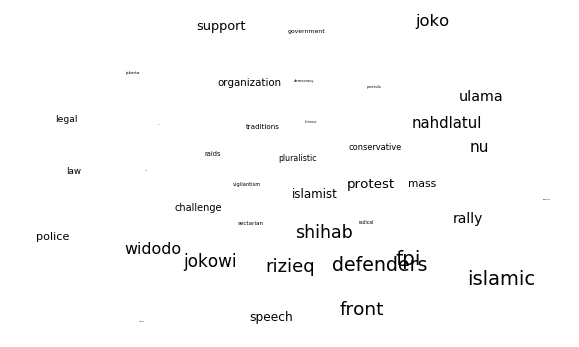

In [371]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsJP[:, 0], tsneWordsJP[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(newsTargetWords):
    ax.annotate(word, (tsneWordsJP[:, 0][i],tsneWordsJP[:, 1][i]), size =  20 * (len(newsTargetWords) - i) / len(newsTargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

Define some convenient functions for getting dimensions.

In [372]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

Let's calculate three dimensions: action, ideology, and government.

**SMO** will classify each social movement organizations, which are FPI and HTI.

**Action** will reveal which activities each social movement organizations are more related to.

**Ideology** will reveal which ideological tendencies each social movement organizations have.

**Government** will show how the government act towards each social movement organizations.

In [386]:
SMO = dimension(news_W2V, ['fpi', 'islamic', 'defenders', 'front'], ['nu', 'nahdlatul', 'ulama'])
Institution = dimension(news_W2V, ['mass', 'organization'], ['government', 'police', 'jokowi'])
#Actors = dimension(news_W2V, ['rizieq'], ['jokowi'])
Organization = dimension(news_W2V, ['mass', 'organization'], ['political', 'party'])

In [390]:
Action = ["rally","protest","support","speech", "challenge", "raids", "vigilantism", "coalition", "campaign"]

Ideology = ["islamist", "conservative", "pluralistic", "traditions", "sectarian", "radical", "democracy", "pancasila", "tolerance", "sharia", "secular"]
            
Government  = ["police", "legal", "law", "government", "jakarta", "ban", "election", "coalition"]

Define a function to project words in a word list to each of the three dimensions.

In [391]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    d = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), SMO.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Institution.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Actors.reshape(1,-1))[0][0])
        d.append(sklearn.metrics.pairwise.cosine_similarity(model[word].reshape(1,-1), Organization.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'SMO': g, 'Institution': r, 'Actors': c, 'Organization': d}, index = word_list)
    return df

Get the projections.

In [392]:
model = gensim.models.word2vec.Word2Vec(df_new['normalized_sents'].sum())

In [393]:
Actiondf = makeDF(model, Action) 
Ideologydf = makeDF(model, Ideology)
Governmentdf = makeDF(model, Government)

Define some useful functions for plotting.

In [394]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

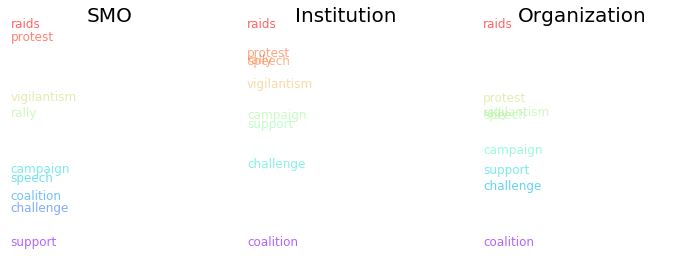

In [395]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Actiondf, 'SMO')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Actiondf, 'Institution')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Actiondf, 'Organization')
plt.show()

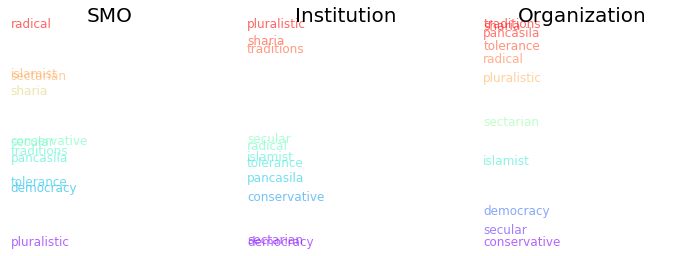

In [396]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Ideologydf, 'SMO')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Ideologydf, 'Institution')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Ideologydf, 'Organization')
plt.show()

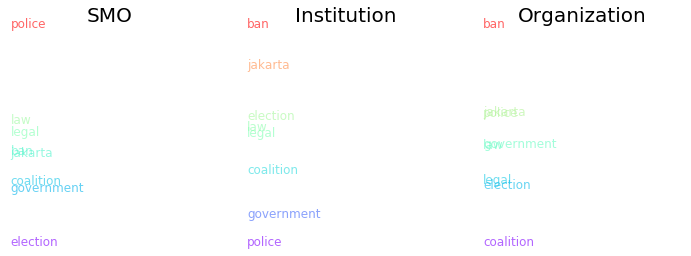

In [397]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Governmentdf, 'SMO')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Governmentdf, 'Institution')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Governmentdf, 'Organization')
plt.show()